In [4]:
import numpy as np
import pandas as pd
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
import pathlib
import cv2
import os
import shutil
import random

## Division des données

In [7]:
path=pathlib.Path("C:/Users/ranus/alzheimer/archive(1)/OriginalDataset")
path2=os.path.join(path,"SplitData")
train_dir=os.path.join(path2,'train')
os.mkdir("train")
valid_dir=os.path.join(path2,'validation')
os.mkdir("validation")
test_dir=os.path.join(path2,'test')
os.mkdir("test_dir")

train_dir_MildDemented=os.path.join(train_dir,"MildDemented")
os.mkdir("train_dir_MildDemented")

valid_dir_MildDemented=os.path.join(train_dir,"MildDemented")
os.mkdir("validation_dir_MildDemented")

test_dir_MildDemented=os.path.join(test_dir,"MildDemented")
os.mkdir("test_dir_MildDemented")

train_dir_ModerateDemented=os.path.join(train_dir,"ModerateDemented")
os.mkdir("train_dir_ModerateDemented")

valid_dir_ModerateDemented=os.path.join(train_dir,"ModerateDemented")
os.mkdir("validation_dir_ModerateDemented")

test_dir_ModerateDemented=os.path.join(test_dir,"ModerateDemented")
os.mkdir("test_dir_ModerateDemented")

train_dir_NonDemented=os.path.join(train_dir,"NonDemented")
os.mkdir("train_dir_NonDemented")

valid_dir_NonDemented=os.path.join(train_dir,"NonDemented")
os.mkdir("validation_dir_NonDemented")

test_dir_NonDemented=os.path.join(test_dir,"NonDemented")
os.mkdir("test_dir_NonDemented")


train_dir_VeryMildDemented=os.path.join(train_dir,"VeryMildDemented")
os.mkdir("train_dir_VeryMildDemented")

valid_dir_VeryMildDemented=os.path.join(train_dir,"VeryMildDemented")
os.mkdir("validation_dir_VeryMildDemented")

test_dir_VeryMildDemented=os.path.join(test_dir,"VeryMildDemented")
os.mkdir("test_dir_VeryMildDemented")

fnames=['{}.jpg'.format(i) for i in range(0,2*896//4)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(train_dir_MildDemented,fname)
    shutil.copyfile(src,dst)

fnames=['{}.jpg'.format(i) for i in range(2*896//4,3*896//4)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(valid_dir_MildDemented,fname)
    shutil.copyfile(src,dst)

    fnames=['{}.jpg'.format(i) for i in range(3*896//4,896)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(test_dir_MildDemented,fname)
    shutil.copyfile(src,dst)

    fnames=['{}.jpg'.format(i) for i in range(0,2*64//4)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(train_dir_ModerateDemented,fname)
    shutil.copyfile(src,dst)
    
fnames=['{}.jpg'.format(i) for i in range(2*64//4,3*64//4)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(valid_dir_ModerateDemented,fname)
    shutil.copyfile(src,dst)

    fnames=['{}.jpg'.format(i) for i in range(3*64,64)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(test_dir_ModerateDemented,fname)
    shutil.copyfile(src,dst)

    fnames=['{}.jpg'.format(i) for i in range(0,3200//2)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(train_dir_NonDemented,fname)
    shutil.copyfile(src,dst)

    fnames=['{}.jpg'.format(i) for i in range(3200//2,3*3200//4)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(valid_dir_NonDemented,fname)
    shutil.copyfile(src,dst)

    fnames=['{}.jpg'.format(i) for i in range(3*3200//4,3200)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(test_dir_NonDemented,fname)
    shutil.copyfile(src,dst)

fnames=['{}.jpg'.format(i) for i in range(3*2240//4,2240)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(test_dir_VeryMildDemented,fname)
    shutil.copyfile(src,dst)

fnames=['{}.jpg'.format(i) for i in range(2240//2,3*2240//4)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(valid_dir_VeryMildDemented,fname)
    shutil.copyfile(src,dst)
    
fnames=['{}.jpg'.format(i) for i in range(0,2240//2)]
for fname in fnames:
    src=os.path.join(path,fname)
    dst=os.path.join(train_dir_VeryMildDemented,fname)
    shutil.copyfile(src,dst)
#MildDemented:896 FICHIER
#ModerateDemented:64
#NonDemented: 3200
#VeryMildDemented: 2240

## Pré traitement des données

In [1]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')
valid_generator=valid_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=20,class_mode='binary')

NameError: name 'ImageDataGenerator' is not defined

In [2]:
image=[]
categorie=[]
for dirname, _,filenames in os.walk(path2):
    for filename in filenames:
        #print(os.path.join(dirname,filename))
        #image=image.append(str(path/filename/filenames))
        #categorie=categorie.append(str(filename))
        image+=[os.path.join(dirname, filename)]
        categorie+=[dirname.split('/')[-1]]

#data_df=pd.DataFrame(columns=['image','cate'])
#data_df['image']=image
#data_df['cate']=categorie
#data_df.head()
df=pd.DataFrame({"images":image,"categories":categorie})
df
np.random.shuffle(df)

images  \
0     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
1     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
2     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
3     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
4     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
...                                                 ...   
6395  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
6396  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
6397  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
6398  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   
6399  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...   

                                             categories  
0     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
1     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
2     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
3     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
4     C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
...                                                 ...  
6395  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
6396  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
6397  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
6398  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  
6399  C:\Users\ranus\alzheimer\archive(1)\OriginalDa...  

[6400 rows x 2 columns]

In [3]:
data, data_test=train_test_split(df,test_size=0.25)
data_train, data_validation=train_test_split(data,test_size=0.33)

(208, 176, 3)

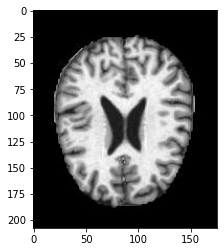

In [4]:
p=random.randint(0,data_train.shape[0])
p
photo=data_train.iloc[p,0]
image=cv2.imread(photo)/255
plt.imshow(image)
image.shape

## Classification

### Modele de CNN

In [5]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(208,176,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 87, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 20, 128)      0

In [6]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["acc"])

### Traitement des données

In [11]:
#from keras.preprocessing.image import ImageDataGenerator

#train_datagen=ImageDataGenerator(rescale=1./255)
#test_datagen=ImageDataGenerator(rescale=1./255)
data_test
def traitement(data):
    for i in range(0,data.shape[0]-1):
        images+=[cv2.imread(data.iloc[i:0])/255]
        labels+=[data.iloc[i:1]]